<h2>Checking for Corrupted Image and Removing them

In [17]:
cat_train = "D:/CODING/ML_project/IEEE_Parkinson/image pre proc/dataset/train/African"
dog_train = "D:/CODING/ML_project/IEEE_Parkinson/image pre proc/dataset/train/Asian"
# cat_train_store = "/Users/sohomsen/Downloads/dataset/train/African1"
# dog_train_store = "/Users/sohomsen/Downloads/dataset/train/Asian1"

cat_test = "D:/CODING/ML_project/IEEE_Parkinson/image pre proc/dataset/test/African"
dog_test = "D:/CODING/ML_project/IEEE_Parkinson/image pre proc/dataset/test/Asian"
# cat_test_store = "/Users/sohomsen/Downloads/dataset/test/African1"
# dog_test_store = "/Users/sohomsen/Downloads/dataset/test/Asian1"

# directory_list_train = [cat_train,dog_train]
# directory_list_test = [cat_test,dog_test]

In [18]:
def check_image1(dir_path):
    import os
    from PIL import Image

    # Specify the directory path that contains the images
    # dir_path = 'path/to/directory'

    # Iterate over all files in the directory
    for filename in os.listdir(dir_path):
        file_path = os.path.join(dir_path, filename)

        # Check if the file is an image file
        if not file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        try:
            # Open the image and check if it is corrupted
            with Image.open(file_path) as img:
                img.verify()

        except (IOError, SyntaxError) as e:
            # Delete the corrupted image and print a message
            os.remove(file_path)
            print(f"{filename} has been deleted because it is corrupted.")

            continue

        # Print a message for the valid image
        # print(f"{filename} is a valid image.")

In [7]:
def check_image(paths,flag):
    import os
    from PIL import Image
    newFolder_path = "/Users/sohomsen/Downloads/dataset"+"/"+flag
    os.mkdir(newFolder_path)
    extensions = {'jpg':1,'jpeg':1,'png':1}

    for path in paths:
        temp = path.split("/")[-1]
        files = os.listdir(path)
        # newFolder_image = newFolder_path + "/" + temp
        # print(newFolder_image)
        # os.mkdir(newFolder_image)
        for file in files:
            ext = file.split(".")[-1]
            # print(ext)
            if ext in extensions:
                try:
                    with Image.open(path+"/"+file) as img:
                        img.verify()
                        im = Image.open(path+"/"+file)
                        # im_resized = im.resize((1000,1000))
                        # filepath = f"{newFolder_image}/{file}.jpg"
                        # im_resized.save(filepath)
                except (IOError, SyntaxError) as e:
                    os.remove(path+"/"+file) # remove the corrupted file
                    print(str(file)+" : The image file is corrupted and has been removed.")

In [16]:
check_image1(cat_train)

In [19]:
check_image1(cat_test)

In [ ]:
check_image(directory_list_test,"test1")

In [ ]:
check_image(directory_list_train,"train1")

<h2>AUC-ROC and AUC-PR

In [6]:
def AUC_ROC_generator(y_test, y_pred,model_name):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_roc = auc(fpr, tpr)

    plt.figure(dpi=100)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC={auc_roc:.3f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for '+model_name)
    plt.legend(loc="lower right")
    plt.show()

def AUC_PR_generator(y_test, y_pred,model_name):
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_recall_curve, average_precision_score,auc
    precision,recall,thresholds=precision_recall_curve(y_test, y_pred)
    avg_precision=average_precision_score(y_test, y_pred)
    pr_auc=auc(recall,precision)
    plt.figure(dpi=100)
    plt.plot(recall,precision,lw=1,color='red',label=f'AP={avg_precision:.3f};AUC={pr_auc:.3f}')
    plt.fill_between(recall,precision,-1,facecolor='y',alpha=0.5)
    plt.title('PR Curve for '+model_name)
    plt.xlabel('Recall(TPR)')
    plt.ylabel('Precision')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.legend()
    plt.show()

<h2>CNN

In [11]:
def CNN_Model():
    import tensorflow as tf
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from sklearn.metrics import classification_report
    from PIL import Image

    cnn = tf.keras.models.Sequential()

    train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
    training_set = train_datagen.flow_from_directory('/Users/sohomsen/Desktop/DataScience/Classification/ImageClassification/WasteClassification/untitled folder/train', target_size=(64,64), batch_size=32,class_mode='binary')

    test_datagen = ImageDataGenerator(rescale=1./255)
    test_set = test_datagen.flow_from_directory('/Users/sohomsen/Desktop/DataScience/Classification/ImageClassification/WasteClassification/untitled folder/val', target_size=(64,64), batch_size=32,class_mode='binary')

    hidden_layer = int(input("Enter number of hidden layers you want : "))
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=[64,64,3]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    for _ in range(hidden_layer-1):
        cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
        cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    
    cnn.add(tf.keras.layers.Flatten())

    cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))
    cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

    probs = cnn.predict(test_set)
    print(probs)

    # predict_datagen = ImageDataGenerator(rescale=1./255)
    # test_image = predict_datagen.apply_transform("/Users/sohomsen/Downloads/dataset/test/test/African1/af_te1.jpg.jpg")

    # #img = Image.open("/Users/sohomsen/Downloads/dataset/test/test/African1/af_te1.jpg.jpg")
    # preds = cnn.predict(test_image)
    # print("Predicted : ",preds)

    model_name = "CNN"
    AUC_ROC_generator(test_set.classes,probs,model_name)
    
    return probs, test_set.classes

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
705/706 [============================>.] - ETA: 0s - loss: 0.4902 - accuracy: 0.7649WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x28fd6d9d0> and will run it as-is.
Please report this to the TensorFlow tea

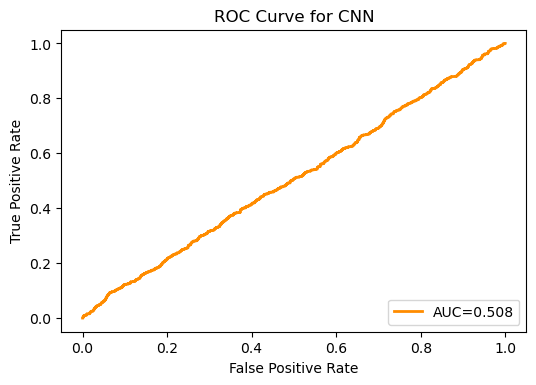

In [12]:
probs, test_set = CNN_Model()

<h2><b>CNN using PyTorch

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the CNN model
class CNN(nn.Module):
    def __init__(self, num_hidden_layers):
        super(CNN, self).__init__()
        
        self.num_hidden_layers = num_hidden_layers
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU(inplace=True)
        
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        
        # Create hidden layers based on user input
        self.hidden_layers = nn.ModuleList()
        for i in range(num_hidden_layers):
            self.hidden_layers.append(nn.Linear(64 * 8 * 8, 64 * 8 * 8))
            self.hidden_layers.append(nn.ReLU(inplace=True))
        
        self.fc = nn.Linear(64 * 8 * 8, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        
        x = self.maxpool(x)
        
        x = self.flatten(x)
        
        # Apply hidden layers
        for layer in self.hidden_layers:
            x = layer(x)
        
        x = self.fc(x)
        
        return x

################################### DATASET LOADING #################################
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Define the path to the directory containing the user's images
train_dir = '/Users/sohomsen/Desktop/DataScience/Classification/ImageClassification/WasteClassification/untitled folder/train'
test_dir = '/Users/sohomsen/Desktop/DataScience/Classification/ImageClassification/WasteClassification/untitled folder/val'

# Define transforms to normalize the data
transform = transforms.Compose([
    transforms.Resize((32, 32)),    # resize the images to 32x32
    transforms.ToTensor(),          # convert the images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # normalize the images
])

# Create an ImageFolder dataset using the user's data directory and the transforms
train_dataset = ImageFolder(train_dir, transform=transform)
test_dataset = ImageFolder(test_dir, transform=transform)

# Create a DataLoader to provide batches of training data
batch_size = 64  # the size of each batch
shuffle = True   # whether to shuffle the data
num_workers = 2  # the number of worker processes for parallel data loading
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
print("Dataset Loading Done")
##################################### DATASET DONE ###################################

# Define the CNN model
num_classes = 2              # the number of output classes
num_hidden_layers = 4    # the number of hidden layers specified by the user
model = CNN(num_hidden_layers)                  # define the CNN model with the specified number of hidden layers
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model using the dataloader
for epoch in range(10):
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()
        
        # Update model parameters
        optimizer.step()
        optimizer.zero_grad()
        
    # Test the model using the testing data
    model.eval()
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, targets in test_loader:
            # Forward pass
            outputs = model(inputs)
            
            # Compute predictions
            _, predicted = torch.max(outputs, dim=1)
            
            # Compute number of correct predictions
            total_correct += (predicted == targets).sum().item()
            total_samples += targets.size(0)
        
        # Compute accuracy
        accuracy = total_correct / total_samples
        print('Epoch {}, Test accuracy: {:.2f}%'.format(epoch, accuracy * 100))
        
    model.train()

Dataset Loading Done


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x16384 and 4096x4096)